# MLDL Project


#Importing Statements

In [184]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [185]:
df = pd.read_csv("cardio_train.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [187]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
df.count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
dtype: int64

In [189]:
df.shape

(70000, 13)

<Axes: xlabel='cardio'>

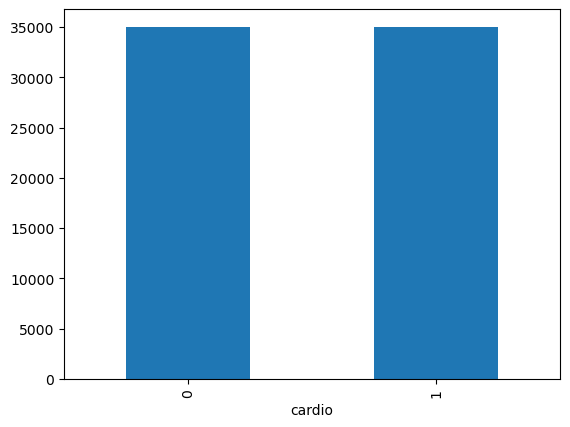

In [190]:
#Information for number of cardio patients
df['cardio'].value_counts().plot(kind = "bar")

In [191]:
#Checking for sum of null columns in data
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='cholesterol'>

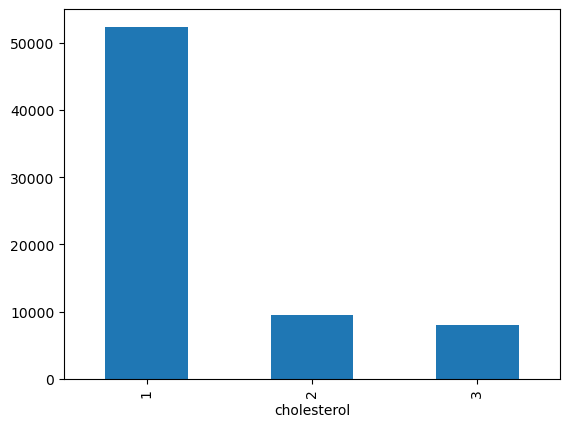

In [192]:
#Information for Cholesterol patients
df['cholesterol'].value_counts().plot(kind = "bar")

Text(0.5, 1.0, 'Sample Age Scatter Plot')

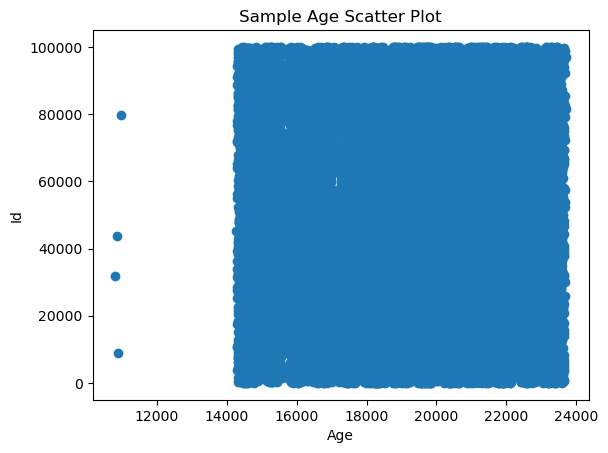

In [193]:
plt.scatter(df['age'],df['id'])
plt.xlabel("Age")
plt.ylabel("Id")
plt.title("Sample Age Scatter Plot")

In [194]:
median_age = df.loc[df['age'] >= 14000, 'age'].median()
median_age

19703.0

In [195]:
df.loc[df['age'] < 14000, 'age'] = median_age
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [196]:
df["ageInYr"] = (df["age"] / 365).round(2)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.71
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.92
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.24
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.45


In [197]:
df = df.drop(columns=["age"])
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45


Text(0.5, 1.0, 'Sample Weight Scatter Plot')

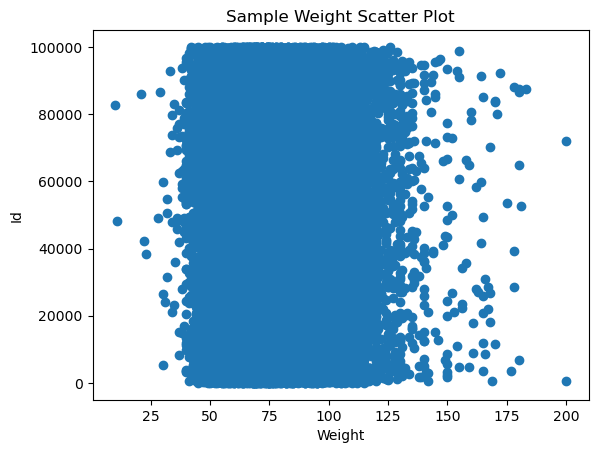

In [198]:
plt.scatter(df['weight'],df['id'])
plt.xlabel("Weight")
plt.ylabel("Id")
plt.title("Sample Weight Scatter Plot")

In [199]:
weight_outliers1 = df[df['weight'] < 25] 
weight_outliers2 = df[(df['weight']>=200)]
print(weight_outliers1)
print(weight_outliers2)


          id  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
26806  38312       1     157    23.0    110     80            1     1      0   
29488  42156       2     177    22.0    120     80            1     1      1   
33817  48318       2     178    11.0    130     90            1     1      0   
57858  82567       2     165    10.0    180   1100            2     2      0   
60188  85931       1     162    21.0    120     80            2     1      0   

       alco  active  cardio  ageInYr  
26806     0       1       0    63.79  
29488     1       1       0    55.91  
33817     0       1       1    59.13  
57858     0       1       1    51.52  
60188     0       1       1    59.88  
          id  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
435      618       1     186   200.0    130     70            1     1      0   
50413  71945       2     180   200.0    150     90            1     1      0   

       alco  active  cardio  ageInYr  
435  

In [200]:
df = df[~df['weight'].isin([10, 11])]
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45


In [201]:
weight_median = df.loc[(df['weight'] >= 25) & (df['weight'] <= 200), 'weight'].median()

# Replace weights < 25 or > 200
df.loc[(df['weight'] < 25) | (df['weight'] >= 200), 'weight'] = weight_median
df


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45


Text(0.5, 1.0, 'Sample Weight Scatter Plot')

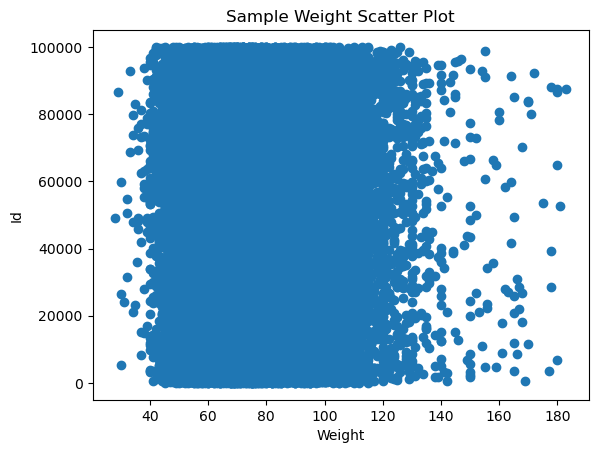

In [202]:
plt.scatter(df['weight'],df['id'])
plt.xlabel("Weight")
plt.ylabel("Id")
plt.title("Sample Weight Scatter Plot")

In [203]:
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['weight'] < Q1 - 1.5 * IQR) |
    (df['weight'] > Q3 + 1.5 * IQR)
]

outliers

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr
15,24,2,172,112.0,120,80,1,1,0,0,0,1,45.98
62,81,2,187,115.0,130,90,1,1,0,1,1,0,55.70
83,114,1,152,110.0,160,90,1,1,0,0,1,1,53.62
196,267,1,176,108.0,140,90,1,1,0,0,0,0,62.12
267,366,1,165,115.0,150,100,1,1,0,0,1,1,47.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69873,99799,2,188,108.0,130,80,2,2,0,1,0,1,54.07
69946,99925,1,164,115.0,130,80,1,1,0,0,1,1,58.45
69947,99930,2,172,113.0,110,80,1,1,0,0,0,1,63.85
69981,99972,2,182,110.0,130,90,2,2,0,0,1,1,47.95


Text(0.5, 1.0, 'Sample Weight Scatter Plot')

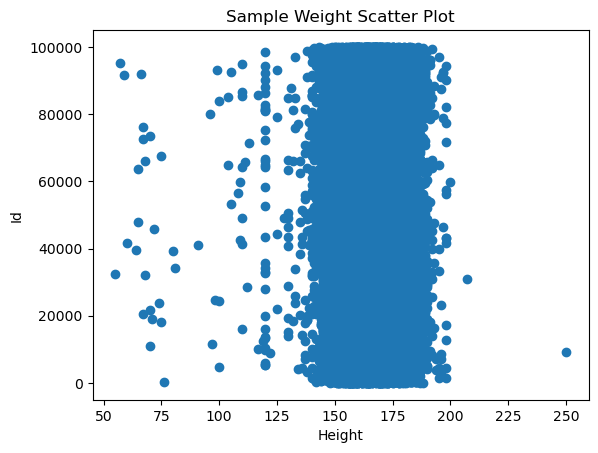

In [204]:
plt.scatter(df['height'],df['id'])
plt.xlabel("Height")
plt.ylabel("Id")
plt.title("Sample Weight Scatter Plot")

In [205]:
height_median = df.loc[(df["height"] >= 100) & (df["height"] <= 220), "height"].median()
df.loc[(df["height"] < 100) | (df["height"] > 220), "height"] = height_median


Text(0.5, 1.0, 'Sample Weight Scatter Plot')

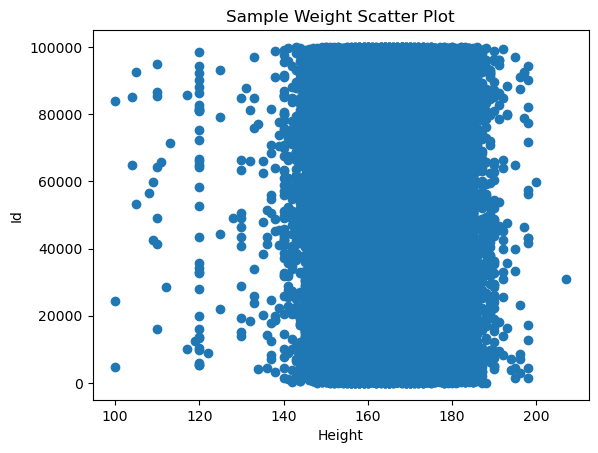

In [206]:
plt.scatter(df['height'],df['id'])
plt.xlabel("Height")
plt.ylabel("Id")
plt.title("Sample Weight Scatter Plot")

In [207]:
# BMI
df["bmi"] = (df["weight"] / (df["height"]/100)**2).round(2)
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_2432\1745465569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmi"] = (df["weight"] / (df["height"]/100)**2).round(2)


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


Text(0.5, 1.0, 'Sample Glucose Scatter Plot')

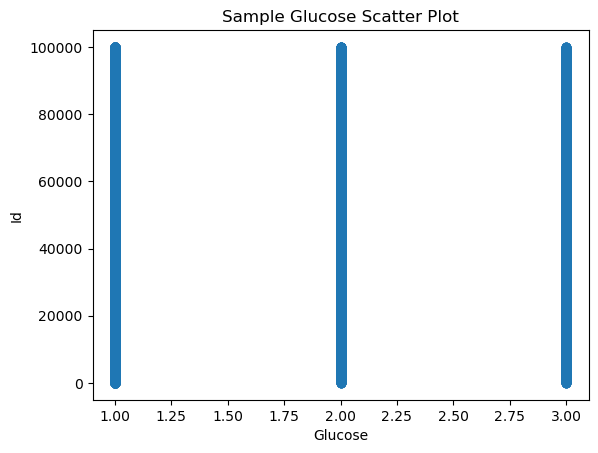

In [208]:
plt.scatter(df['gluc'],df['id'])
plt.xlabel("Glucose")
plt.ylabel("Id")
plt.title("Sample Glucose Scatter Plot")

Text(0.5, 1.0, 'Sample cholesterol Scatter Plot')

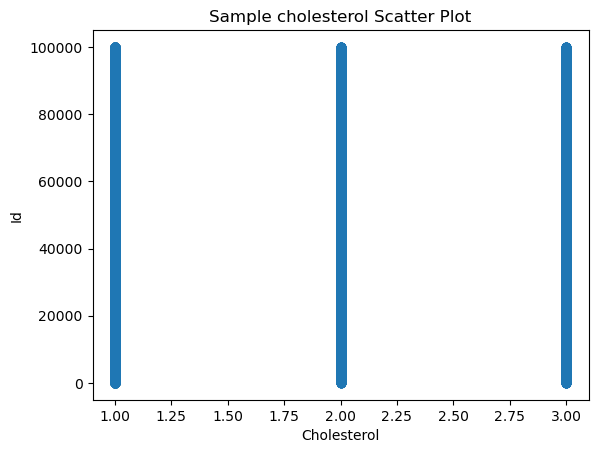

In [209]:
plt.scatter(df['cholesterol'],df['id'])
plt.xlabel("Cholesterol")
plt.ylabel("Id")
plt.title("Sample cholesterol Scatter Plot")

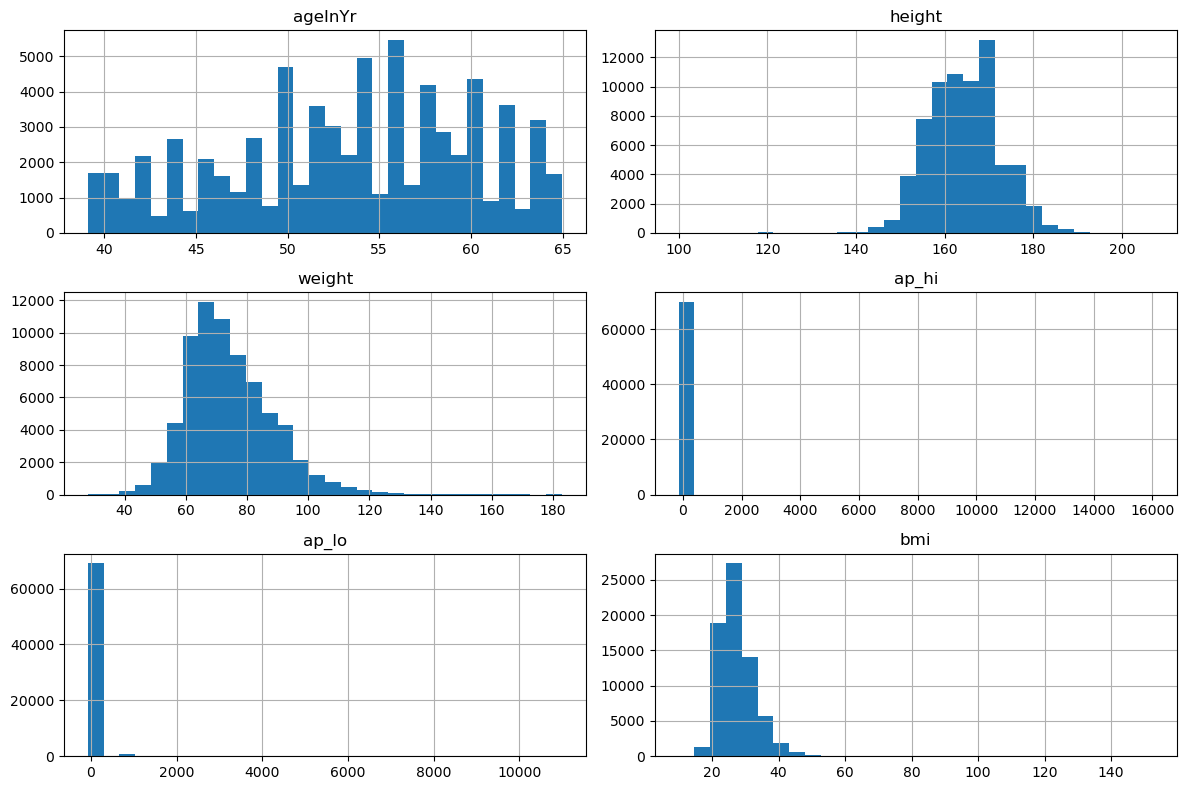

In [210]:
num_cols = ["ageInYr", "height", "weight", "ap_hi", "ap_lo", "bmi"]

# Histograms
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()



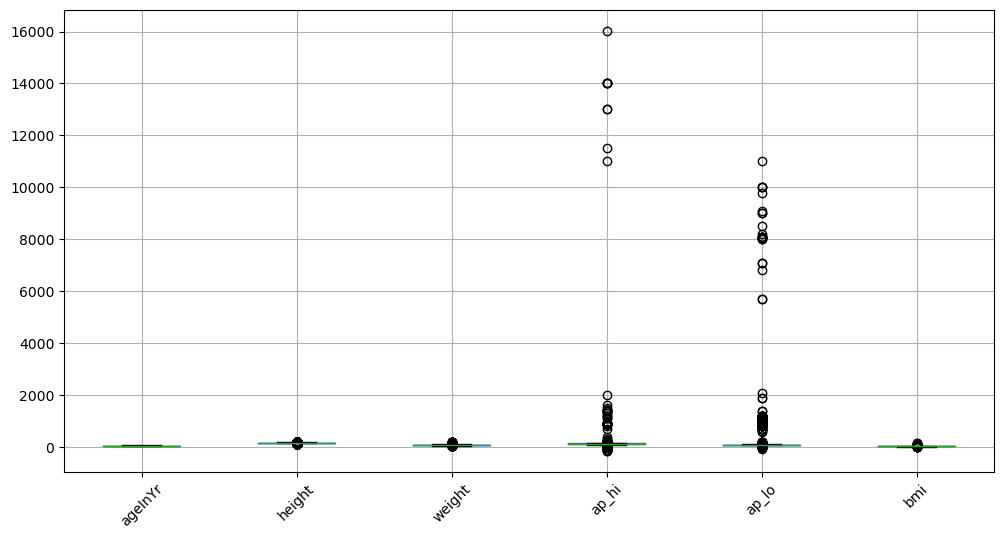

In [211]:
# Boxplots for each numeric column
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

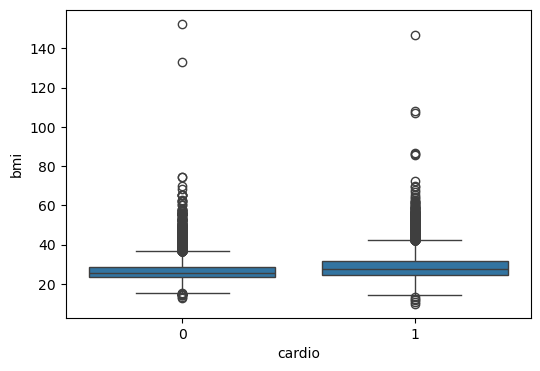

In [212]:
# Boxplot by target for one feature (example: bmi vs cardio)
plt.figure(figsize=(6, 4))
sns.boxplot(x="cardio", y="bmi", data=df)
plt.show()

Text(0.5, 1.0, 'Sample BMI Scatter Plot')

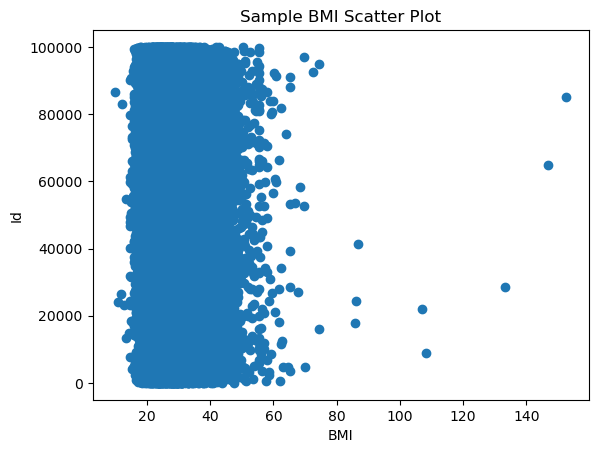

In [213]:
plt.scatter(df['bmi'],df['id'])
plt.xlabel("BMI")
plt.ylabel("Id")
plt.title("Sample BMI Scatter Plot")

In [217]:
(df['bmi'] > 70).value_counts()

bmi
False    69987
True        11
Name: count, dtype: int64

In [218]:
bmi_median = df.loc[(df["bmi"] >= 10) & (df["bmi"] <= 70), "bmi"].median()

df.loc[(df["bmi"] < 10) | (df["bmi"] > 70), "bmi"] = bmi_median

In [220]:
ap_outliears = df[df['ap_hi']<df['ap_lo']]
ap_outliears

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
228,314,2,183,98.0,160,1100,1,2,1,0,1,1,47.92,29.26
241,334,2,157,60.0,160,1000,2,1,0,0,0,1,60.09,24.34
260,357,1,150,83.0,140,800,1,1,0,0,1,1,49.91,36.89
329,458,1,176,63.0,160,1000,2,2,0,0,0,1,64.13,20.34
345,482,1,154,81.0,140,1000,2,1,0,0,1,1,51.24,34.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,1,167,81.0,160,1000,1,1,0,0,1,1,63.92,29.04
69872,99798,1,152,56.0,160,1000,1,1,0,0,1,1,59.75,24.24
69878,99807,2,168,95.0,160,1000,1,1,0,0,1,1,58.19,33.66
69885,99816,2,166,78.0,170,1000,1,1,0,0,0,0,61.42,28.31


In [221]:
ap_lo_outliers = (df["ap_lo"] < 0)
ap_lo_outliers.value_counts()

ap_lo
False    69997
True         1
Name: count, dtype: int64

In [222]:
df = df[df["ap_lo"] >= 0]
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


In [223]:
from scipy import stats

numeric_cols = ['ageInYr', 'weight', 'height', 'bmi', 'ap_hi', 'ap_lo']
z_scores = np.abs(stats.zscore(df[numeric_cols]))


In [224]:
outliers = (z_scores > 3)
outliers.value_counts()

ageInYr  weight  height  bmi    ap_hi  ap_lo
False    False   False   False  False  False    67724
                                       True       913
         True    False   True   False  False      411
         False   False   True   False  False      329
         True    False   False  False  False      236
         False   True    False  False  False      223
                         True   False  False       67
                 False   False  True   False       38
         True    False   True   False  True        20
                 True    False  False  False       15
                 False   False  False  True         9
         False   False   True   False  True         6
         True    True    True   False  False        4
         False   True    False  False  True         1
                         True   False  True         1
Name: count, dtype: int64

In [229]:
mask = df['ap_hi'] < df['ap_lo']

df.loc[mask, ['ap_hi', 'ap_lo']] = df.loc[mask, ['ap_lo', 'ap_hi']].values

df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


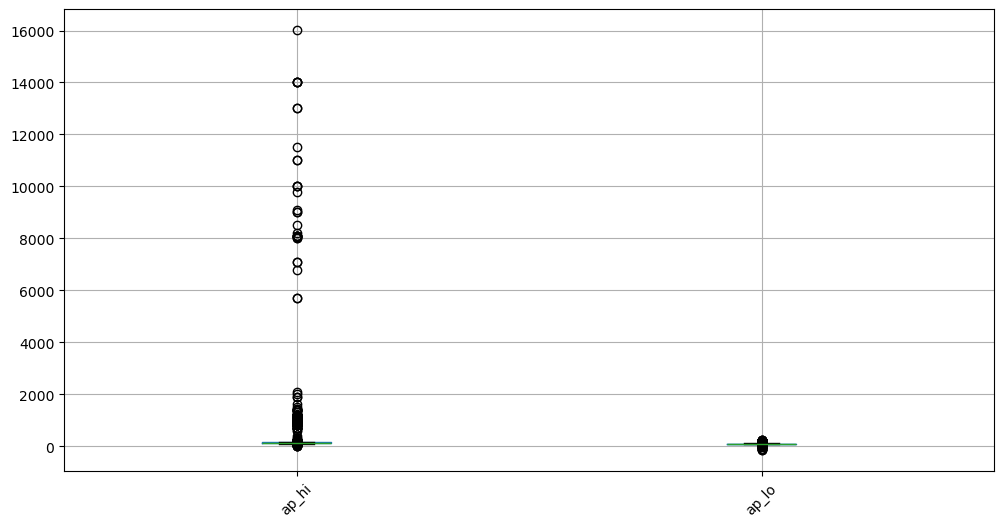

In [230]:
ap_cols = ['ap_hi','ap_lo']

plt.figure(figsize=(12, 6))
df[ap_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Sample Ap_hi Scatter Plot')

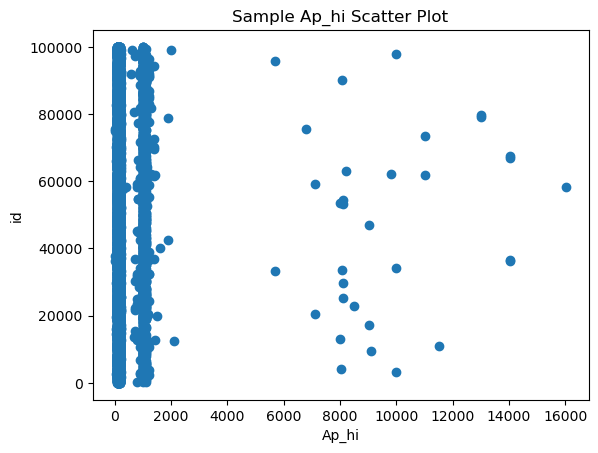

In [231]:
plt.scatter(df['ap_hi'],df['id'])
plt.xlabel("Ap_hi")
plt.ylabel("id")
plt.title("Sample Ap_hi Scatter Plot")

In [232]:
ap_hi_outliers = df[df['ap_hi'] > 2000]
len(ap_hi_outliers)


34

In [233]:
df.drop(df[df['ap_hi'] > 2000].index, inplace=True)
df


C:\Users\DELL\AppData\Local\Temp\ipykernel_2432\1292666605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['ap_hi'] > 2000].index, inplace=True)


,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


Text(0.5, 1.0, 'Sample Ap_lo Scatter Plot')

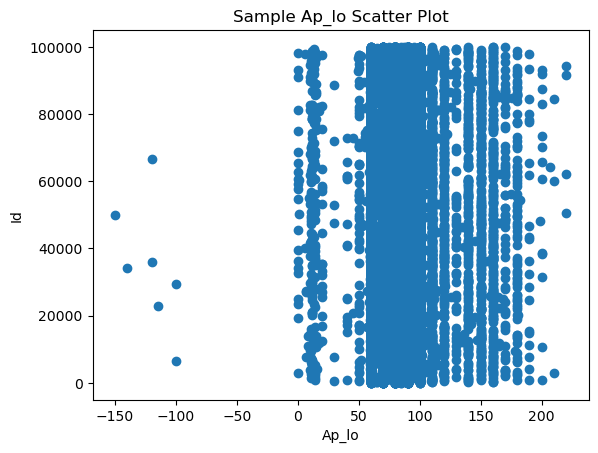

In [234]:
plt.scatter(df['ap_lo'],df['id'])
plt.xlabel("Ap_lo")
plt.ylabel("Id")
plt.title("Sample Ap_lo Scatter Plot")

In [235]:
ap_lo_outliears = df[df['ap_lo'] < 0] 
len(ap_lo_outliears)



7

In [236]:
df = df[df['ap_lo'] >= 0]
df

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


In [237]:
#Information for glucose mean
gluc_mean = df.loc[df['gluc'] != 0,'gluc'].mean()
gluc_mean

1.2264423351821145

<Axes: >

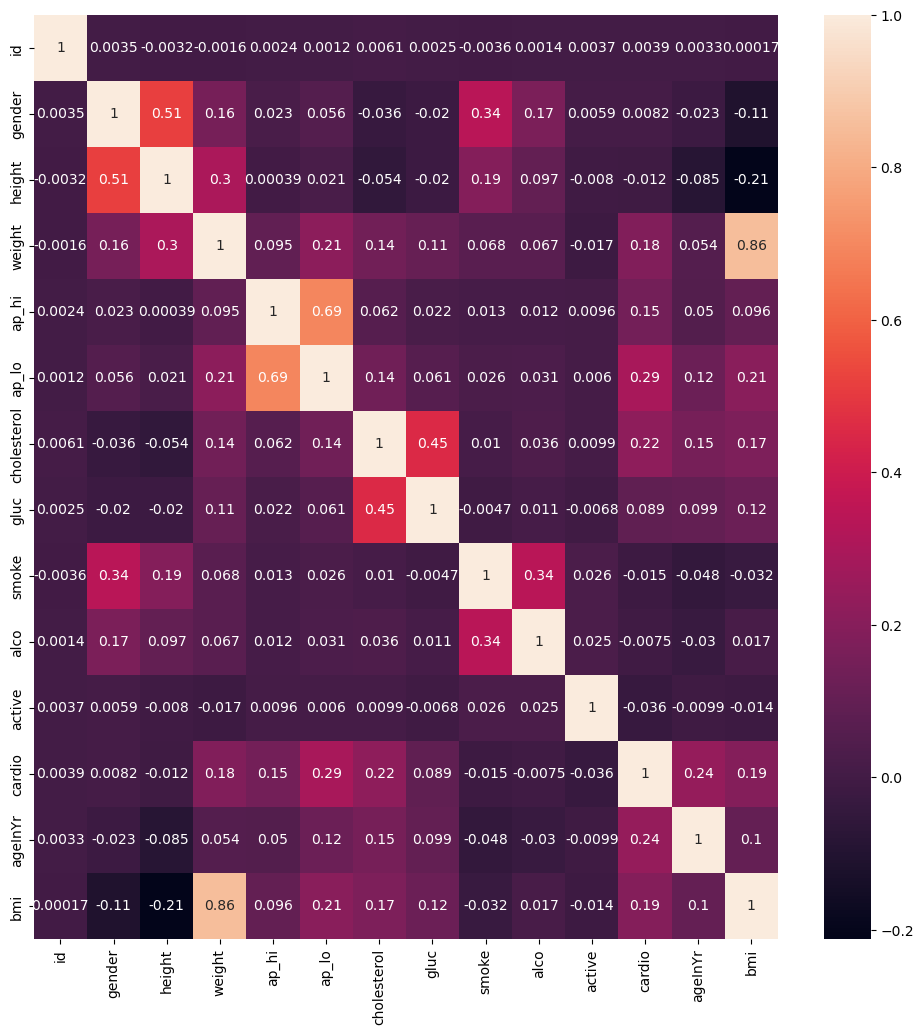

In [238]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [239]:
df.ageInYr.mean()

53.341054662930986

In [240]:
df.weight.max()

183.0

In [241]:
df.weight.mean()


74.20719166333123

In [242]:
#To make data more realistic in ap_hi and ap_lo

# df2 = df[(df['ap_hi'] >=80) & (df['ap_hi'] <=250)]
# df2

In [243]:
# df2 = df[(df['ap_lo'] >=40) & (df['ap_lo'] <=150)]

In [244]:
# df2 = df2[df2['ap_hi']>df2['ap_lo']]
# df2

In [245]:
#To make data more realistic in height and weight

# df2 = df2[(df['height'] >=120) & (df['height'] <=220)]

In [246]:
# df2 = df2[(df['weight'] >=30) & (df['weight'] <=200)]
# df2

In [247]:
# df2['bmi'] = df['weight']/((df['height']/100)**2)

# df2

In [248]:
# df2 = df2[(df2['bmi'] >=10) & (df2['bmi'] <=60)]

# df2

In [249]:
print(df[["ap_hi","ap_lo","height","weight","bmi"]].describe())


              ap_hi         ap_lo        height        weight           bmi
count  69956.000000  69956.000000  69956.000000  69956.000000  69956.000000
mean     138.841915     82.065827    164.394762     74.207192     27.494168
std      106.199066     13.430487      7.987171     14.373244      5.281206
min       12.000000      0.000000    100.000000     28.000000     10.730000
25%      120.000000     80.000000    159.000000     65.000000     23.880000
50%      120.000000     80.000000    165.000000     72.000000     26.370000
75%      140.000000     90.000000    170.000000     82.000000     30.180000
max     2000.000000    220.000000    207.000000    183.000000     70.000000


In [250]:
df[df["ap_lo"] > df["ap_hi"]].shape


(0, 14)

In [251]:
df.groupby("gender")[['ap_hi','ap_lo']].mean()

,ap_hi,ap_lo
gender,,
1,137.034302,81.511899
2,142.206430,83.096855


In [252]:
df.groupby("gender")["cardio"].sum()

gender
1    22601
2    12352
Name: cardio, dtype: int64

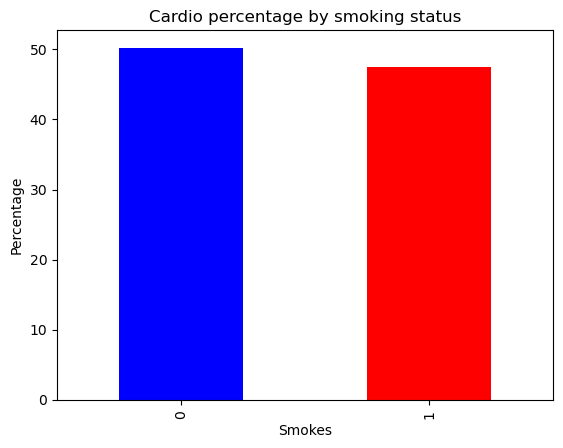

In [253]:
group = df.groupby('smoke')["cardio"].mean()*100
group.plot(kind="bar" , color=["blue","red"])
plt.title("Cardio percentage by smoking status")
plt.ylabel("Percentage")
plt.xlabel("Smokes")
plt.show()

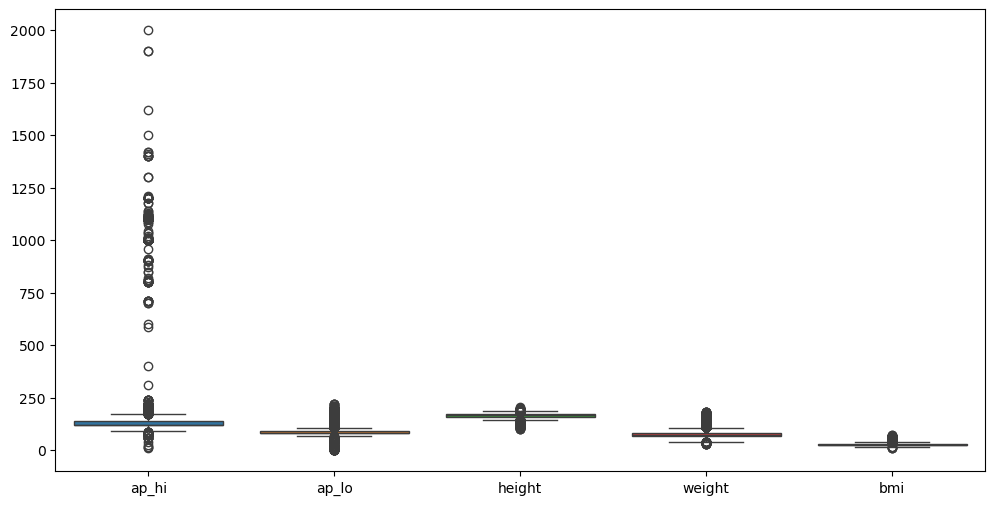

In [254]:


cols = ["ap_hi","ap_lo","height","weight","bmi"]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.show()


In [255]:
df['bmi'].describe()

count    69956.000000
mean        27.494168
std          5.281206
min         10.730000
25%         23.880000
50%         26.370000
75%         30.180000
max         70.000000
Name: bmi, dtype: float64

In [256]:
numeric_cols = ['ageInYr', 'weight', 'height', 'bmi', 'ap_hi', 'ap_lo']
z_scores = np.abs(stats.zscore(df[numeric_cols]))

outliers = (z_scores > 3)
outliers.value_counts()

ageInYr  weight  height  bmi    ap_hi  ap_lo
False    False   False   False  False  False    67438
                                True   True       873
         True    False   True   False  False      408
         False   False   True   False  False      325
                         False  False  True       277
         True    False   False  False  False      234
         False   True    False  False  False      221
                         True   False  False       67
                 False   False  True   False       46
         True    False   True   True   True        20
                 True    False  False  False       15
                 False   False  True   True         9
         False   False   True   True   True         5
         True    True    True   False  False        4
         False   False   True   False  True         4
         True    False   True   False  True         3
                         False  False  True         2
         False   True    False  False

In [260]:
df = df.drop(columns=["id"])
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,ageInYr,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.39,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55.42,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,51.66,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48.28,28.71
4,1,156,56.0,100,60,1,1,0,0,0,0,47.87,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1,0,52.71,26.93
69996,1,158,126.0,140,90,2,2,0,0,1,1,61.92,50.47
69997,2,183,105.0,180,90,3,1,0,1,0,1,52.24,31.35
69998,1,163,72.0,135,80,1,2,0,0,0,1,61.45,27.10


In [261]:
path = ""
df.to_csv(path + "cardio_prepocessed.csv",index=False)
print("Dataset Saved")

Dataset Saved
